<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайны-лес" data-toc-modified-id="Случайны-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайны лес</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Итоговая-sMAPE" data-toc-modified-id="Итоговая-sMAPE-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Итоговая sMAPE</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

В следующей ячейке импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
import warnings
warnings.simplefilter("ignore")

Откроем файл и просмотрим данные:

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Похоже во всех списках есть значения NaN, можно их заменить значениями из соседних строк, так как по условию задачи данные в соседних строках не сильно отличаются.

In [6]:
df_test = df_test.fillna(method="ffill")
df_train = df_train.fillna(method="ffill")


Так же судя по всему есть недостающие столбцы с признаками в тестовой выборке, посмотрим на эти столбцы:

In [7]:
data = sorted(list(set(df_train.columns.tolist()) - set(df_test.columns.tolist())))
data

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Похоже не хватает столбцов с целевыми признаками, а так же столбцов которые менее важны для модели, а именно данных о расчетах, о выходе хвостов и концентрации реагентов, если целевые признаки нужны, то остальные можно удалить:

In [8]:
data = sorted(list(set(data) - set(['final.output.recovery', 'rougher.output.recovery'])))
df_train = df_train.drop(data, axis=1)
df_add = df_full[['rougher.output.recovery', 'final.output.recovery', 'date']]
df_test = pd.merge(df_test, df_add, on = 'date', how = 'left')

Далее проверим правильно был расчитан параметр rougher.output.recovery через MAE:

In [9]:
def prediction(c, f, t):
    recovery = (c * (f - t)) / (f * (c - t)) * 100
    return recovery
prediction_recovery = prediction(df_full['rougher.output.concentrate_au'], df_full['rougher.input.feed_au'], df_full['rougher.output.tail_au'])
mean_absolute_error(df_full['rougher.output.recovery'], prediction_recovery)

9.874045668302637e-15

Отклонение получилось гораздо меньше 1%, что можно считать практически нулевой погрешностью.

**Вывод:** Предобратока данных завершена.

## Анализ данных

Далее рассмотрим среднюю концентрацию веществ на каждом этапе:

In [51]:
print('Исходное сырье, ag:', df_full['rougher.input.feed_ag'].mean())
print('флотация, ag:', df_full['rougher.output.concentrate_ag'].mean())
print('первый этап очистки, ag:', df_full['primary_cleaner.output.concentrate_ag'].mean())
print('финальный концентрат, ag:', df_full['final.output.concentrate_ag'].mean())
print('Исходное сырье, pb:',df_full['rougher.input.feed_pb'].mean())
print('флотация, pb:',df_full['rougher.output.concentrate_pb'].mean())
print('первый этап очистки, pb:', df_full['primary_cleaner.output.concentrate_pb'].mean())
print('финальный концентрат, pb:', df_full['final.output.concentrate_pb'].mean())
print('Исходное сырье, au:',df_full['rougher.input.feed_au'].mean())
print('флотация, au:',df_full['rougher.output.concentrate_au'].mean())
print('первый этап очистки, au:', df_full['primary_cleaner.output.concentrate_au'].mean())
print('финальный концентрат, au:', df_full['final.output.concentrate_au'].mean())

Исходное сырье, ag: 8.794927425814688
флотация, ag: 11.994759359873429
первый этап очистки, ag: 8.44240807771906
финальный концентрат, ag: 5.168470373676801
Исходное сырье, pb: 3.598084975395463
флотация, pb: 7.606272313195003
первый этап очистки, pb: 9.829529774200518
финальный концентрат, pb: 9.978894911181722
Исходное сырье, au: 8.266097326589103
флотация, au: 19.772000139486316
первый этап очистки, au: 32.1194004078765
финальный концентрат, au: 44.0765129419528


Концентрация серебра на этапе флотации увеличивается и в дальнешем уменьшается, а концентрация свинца и золота увеличивается.

Далее проверим распределение размеров гранул сырья:

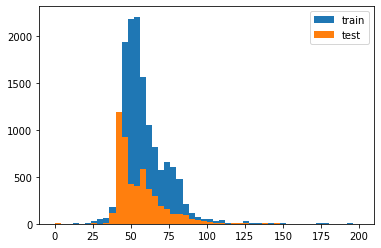

In [53]:
plt.hist(df_train['rougher.input.feed_size'], bins = 50, range = (0, 200), label = 'train')
plt.hist(df_test['rougher.input.feed_size'], bins = 50, range = (0, 200), label = 'test')
plt.legend()
plt.show()

Распределение примерно одинаково, есть заметная разница в количестве данных, но оба распределены нормально вокруг примерно одной и той же средней, если и есть смещение то оно не критичное.

Далее исследуем суммарную концентрацию всех веществ на каждом этапе:

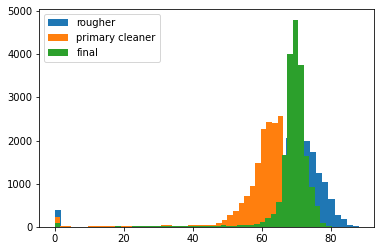

In [36]:
plt.hist(df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_sol'], bins = 50, label = 'rougher')
plt.hist(df_full['primary_cleaner.output.concentrate_ag'] + df_full['primary_cleaner.output.concentrate_au'] + df_full['primary_cleaner.output.concentrate_pb'] + df_full['primary_cleaner.output.concentrate_sol'], bins = 50, label = 'primary cleaner')
plt.hist(df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_sol'], bins = 50, label = 'final')
plt.legend()
plt.show()

Похоже есть аномалии, концентрация вещество во время рабочего процесса не может быть равной нулю, скорее всего рабочая установка была включена и фиксировала данные, когда в неё еще не загрузили смеси, их лучше удалить:

In [13]:
df_drop = df_full[df_full['rougher.output.concentrate_ag'] == 0]
df_test = df_test.loc[~df_test['date'].isin(df_drop['date'])]
df_train = df_train.loc[~df_train['date'].isin(df_drop['date'])]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5193 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5193 non-null   object 
 1   primary_cleaner.input.sulfate               5193 non-null   float64
 2   primary_cleaner.input.depressant            5193 non-null   float64
 3   primary_cleaner.input.feed_size             5193 non-null   float64
 4   primary_cleaner.input.xanthate              5193 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5193 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5193 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5193 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5193 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5193 non-null   float64
 10  primary_clea

**Вывод** Аномалии убраны, можно приступать к обучению.

## Модель

Перед созданием модели стоит разделить и масштабировать аднные:

In [14]:
target_train_r = df_train['rougher.output.recovery']
target_train_f = df_train['final.output.recovery']
features_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)

target_test_r = df_test['rougher.output.recovery']
target_test_f = df_test['final.output.recovery']
features_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
scaler.fit(features_test)
features_test = scaler.transform(features_test)

Далее напишем функцию sMAPE и итоговое sMAPE:

In [15]:
def sMAPE(target, pred): # функция sMAPE
    target = np.array(target)
    n = len(target)
    return 100/n * np.sum(np.abs(target - pred)/((np.abs(target) + np.abs(pred))/2))

def total_sMAPE(smape_r, smape_f): # функция итоговой sMAPE
    return 0.25*smape_r + 0.75*smape_f
 
sMAPE_score = make_scorer(sMAPE, greater_is_better=False) # скоринг для подбора параметров модели

Создадим несколько моделей, подберем параметры и по результатам выберем лучшую из них. 

### Решающее дерево

Найдем лучший параметр модели для таргета флотация и создадим модель:

In [20]:
parametrs = {'max_depth': range (1,70)}
model_dtr_r = DecisionTreeRegressor(random_state=12345)
grid_dtr_r = GridSearchCV(model_dtr_r, parametrs, cv=5, scoring = sMAPE_score, verbose = 3)
grid_dtr_r.fit(features_train, target_train_r)
grid_dtr_r.best_params_

Fitting 5 folds for each of 69 candidates, totalling 345 fits
[CV 1/5] END ....................................max_depth=1; total time=   0.1s
[CV 2/5] END ....................................max_depth=1; total time=   0.1s
[CV 3/5] END ....................................max_depth=1; total time=   0.1s
[CV 4/5] END ....................................max_depth=1; total time=   0.1s
[CV 5/5] END ....................................max_depth=1; total time=   0.1s
[CV 1/5] END ....................................max_depth=2; total time=   0.2s
[CV 2/5] END ....................................max_depth=2; total time=   0.2s
[CV 3/5] END ....................................max_depth=2; total time=   0.2s
[CV 4/5] END ....................................max_depth=2; total time=   0.1s
[CV 5/5] END ....................................max_depth=2; total time=   0.2s
[CV 1/5] END ....................................max_depth=3; total time=   0.2s
[CV 2/5] END ..................................

{'max_depth': 3}

In [39]:
model_dtr_r = DecisionTreeRegressor(random_state=12345, max_depth=3)
#model_dtr_r.fit(features_train, target_train_r)
#predictions_dtr_r = model_dtr_r.predict(features_test)
score_dtr_r = cross_val_score(model_dtr_r, features_train, target_train_r, cv=5, scoring=sMAPE_score) 
score_dtr_r = score_dtr_r.mean()*-1
score_dtr_r

7.189413348636007

Далее сделаем тоже самое с параметром таргета финального концентрата:

In [22]:
parametrs = {'max_depth': range (1,70)}
model_dtr_f = DecisionTreeRegressor(random_state=12345)
grid_dtr_f = GridSearchCV(model_dtr_f, parametrs, cv=5, scoring = sMAPE_score)
grid_dtr_f.fit(features_train, target_train_f)
grid_dtr_f.best_params_

{'max_depth': 2}

In [42]:
model_dtr_f = DecisionTreeRegressor(random_state=12345, max_depth=2)
#model_dtr_f.fit(features_train, target_train_f)
#predictions_dtr_f = model_dtr_f.predict(features_test)
score_dtr_f = cross_val_score(model_dtr_f, features_train, target_train_f, cv=5, scoring=sMAPE_score) 
score_dtr_f = score_dtr_f.mean()*-1
score_dtr_f

10.763313910950188

### Случайны лес

Флотационный концентрат:

In [24]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2)}
model_rfr_r = RandomForestRegressor(random_state=12345)
grid_rfr_r = GridSearchCV(model_rfr_r, parametrs, cv=5, scoring = sMAPE_score)
grid_rfr_r.fit(features_train, target_train_r)
grid_rfr_r.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [43]:
model_rfr_r = RandomForestRegressor(random_state=12345, n_estimators=20, max_depth=5,)
#model_rfr_r.fit(features_train, target_train_r)
#predictions_rfr_r = model_rfr_r.predict(features_test)
score_rfr_r = cross_val_score(model_rfr_r, features_train, target_train_r, cv=5, scoring=sMAPE_score) 
score_rfr_r = score_rfr_r.mean()*-1
score_rfr_r

6.716204550179898

Финальный концентрат:

In [26]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2)}
model_rfr_f = RandomForestRegressor(random_state=12345)
grid_rfr_f = GridSearchCV(model_rfr_f, parametrs, cv=5, scoring = sMAPE_score)
grid_rfr_f.fit(features_train, target_train_f)
grid_rfr_f.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [44]:
model_rfr_f = RandomForestRegressor(random_state=12345, n_estimators=30, max_depth=5,)
#model_rfr_f.fit(features_train, target_train_f)
#predictions_rfr_f = model_rfr_f.predict(features_test)
score_rfr_f = cross_val_score(model_rfr_f, features_train, target_train_f, cv=5, scoring=sMAPE_score) 
score_rfr_f = score_rfr_f.mean()*-1
score_rfr_f

10.233466680343373

### Линейная регрессия

Флотационный концентрат:

In [45]:
model_lr_r = LinearRegression()
#model_lr_r.fit(features_train, target_train_r) 
#predictions_lr_r = model_lr_r.predict(features_test)
score_lr_r = cross_val_score(model_lr_r, features_train, target_train_r, cv=5, scoring=sMAPE_score) 
score_lr_r = score_lr_r.mean()*-1
score_lr_r

7.313959332552993

Финальный концентрат:

In [46]:
model_lr_f = LinearRegression()
#model_lr_f.fit(features_train, target_train_f) 
#predictions_lr_f = model_lr_f.predict(features_test)
score_lr_f = cross_val_score(model_lr_f, features_train, target_train_f, cv=5, scoring=sMAPE_score) 
score_lr_f = score_lr_f.mean()*-1
score_lr_f

12.249265437136184

### Итоговая sMAPE

Лучший показатель качества для предсказания флотационного концентрата и финального концентрата получился у модели линейной регрессии. Рассчитаем для этих моделей итоговый sMAPE: 

In [48]:
model_lr_r.fit(features_train, target_train_r) 
predictions_lr_r = model_lr_r.predict(features_test)
model_lr_f.fit(features_train, target_train_f) 
predictions_lr_f = model_lr_f.predict(features_test)
sMAPE_r = sMAPE(target_test_r, predictions_lr_r)
sMAPE_f = sMAPE(target_test_f, predictions_lr_f)
total_sMAPE(sMAPE_r, sMAPE_f)

9.669242731856118

**Вывод:** По итогам проекта для предсказания параметра rougher.output.recovery выбрана модель линейной регрессии её показатель качества по кросс валидации 7.31, для параметра final.output.recovery выбрана так же модель линейной регрессии её качество 12.24. Общий итоговое sMAPE у моделей 9.66.